In [1]:
library(ggplot2)
library(cowplot)
library(forcats)
library(ggrepel)
library(dplyr)
library(reshape2)
library(patchwork)
library(tidyr)
library(mmtable2)
library(ggalt)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths



Attaching package: ‘mmtable2’


The following object is masked from ‘package:tidyr’:

    table1


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Timepoint A

In [2]:
timepoint_1_country_frequency <- read.csv("../outputFiles/timepoint_1_country_frequency.filteredNI.csv")
summary(timepoint_1_country_frequency)

   country               Both      
 Length:20          Min.   :  1.0  
 Class :character   1st Qu.:  1.0  
 Mode  :character   Median :  2.0  
                    Mean   :  8.4  
                    3rd Qu.:  5.0  
                    Max.   :100.0  

In [3]:
timepoint_1_country_frequency$prop <- timepoint_1_country_frequency$Both / sum(timepoint_1_country_frequency$Both)

In [4]:
timepoint_1_country_frequency <- timepoint_1_country_frequency %>%
  mutate(country = fct_reorder(country, desc(prop)))

In [5]:
timepoint_1_country_frequency

country,Both,prop
<fct>,<dbl>,<dbl>
Chile,1,0.005952381
Portugal,1,0.005952381
New Zealand,1,0.005952381
USA,17,0.101190476
France,5,0.029761905
Switzerland,2,0.011904762
Belgium,1,0.005952381
Germany,5,0.029761905
Netherlands,5,0.029761905


In [6]:
table1 <- gridExtra::tableGrob(timepoint_1_country_frequency[c('country', 'Both','prop')], theme = ttheme_minimal())

In [7]:
timepoint_1_country_frequency$TP_label <- paste0(timepoint_1_country_frequency$country, ' ', round(timepoint_1_country_frequency$prop, digits = 3) * 100, '%')

In [8]:
timepoint_1_country_frequency[ which(timepoint_1_country_frequency$prop<0.029), ]$TP_label <- NA

Warning message:
“Removed 13 rows containing missing values (geom_text).”


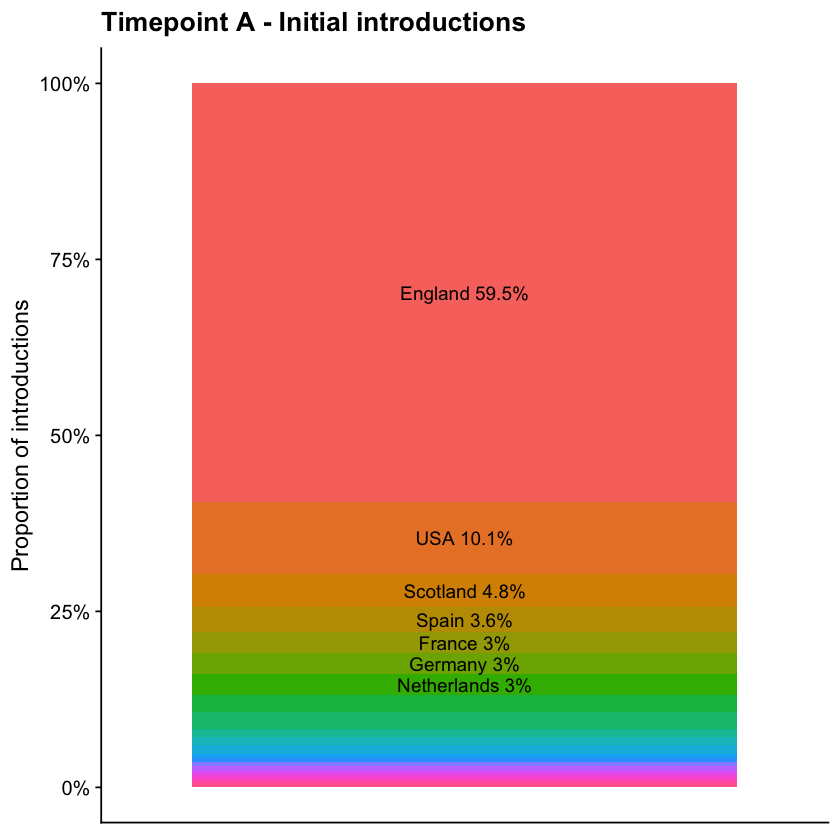

In [9]:
timepoint1_barplot <- ggplot(timepoint_1_country_frequency, aes(x="country",y=prop,fill=country, label=TP_label)) +
theme_cowplot() +
geom_col() +
geom_text(
    size=4,
    position = position_stack(vjust=0.5)
  ) +
theme(legend.position='none', axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
labs(x = "", y = "Proportion of introductions") + scale_y_continuous(labels = scales::percent) + ggtitle("Timepoint A - Initial introductions")

timepoint1_barplot

In [10]:
timepoint_1_parent_country_frequency_distance <- read.csv('../outputFiles/timepoint_1_parent_country_frequency_distance.filteredNI.csv')
summary(timepoint_1_parent_country_frequency_distance)

   longitude          latitude        country          distance_from_ireland
 Min.   :-127.76   Min.   :-43.66   Length:153         Min.   :  320.7      
 1st Qu.: -11.81   1st Qu.:  7.72   Class :character   1st Qu.: 2737.8      
 Median :  19.30   Median : 21.50   Mode  :character   Median : 5768.1      
 Mean   :  15.72   Mean   : 22.30                      Mean   : 5875.8      
 3rd Qu.:  45.40   3rd Qu.: 42.55                      3rd Qu.: 8146.1      
 Max.   : 178.70   Max.   : 65.19                      Max.   :16220.4      
    num_tips            Both              RoI                NI         
 Min.   :    1.0   Min.   :  0.000   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.:    8.0   1st Qu.:  0.000   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median :   29.0   Median :  0.000   Median : 0.0000   Median : 0.0000  
 Mean   :  666.5   Mean   :  1.098   Mean   : 0.6667   Mean   : 0.4314  
 3rd Qu.:  278.0   3rd Qu.:  0.000   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :27699.0   Max.

In [11]:
cor.test(timepoint_1_parent_country_frequency_distance$num_tips, timepoint_1_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_1_parent_country_frequency_distance$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_1_parent_country_frequency_distance$num_tips and timepoint_1_parent_country_frequency_distance$Both
S = 266098, p-value = 1.073e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5542022 


In [12]:
timepoint_1_parent_country_frequency_distance_without_zero <- timepoint_1_parent_country_frequency_distance[ which(timepoint_1_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_1_parent_country_frequency_distance_without_zero$num_tips, timepoint_1_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_1_parent_country_frequency_distance_without_zero$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_1_parent_country_frequency_distance_without_zero$num_tips and timepoint_1_parent_country_frequency_distance_without_zero$Both
S = 334.57, p-value = 0.0001472
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7484462 


In [13]:
p.adjust(p = 0.0001472, n=12, method="bonferroni")

[1] 0.0017664

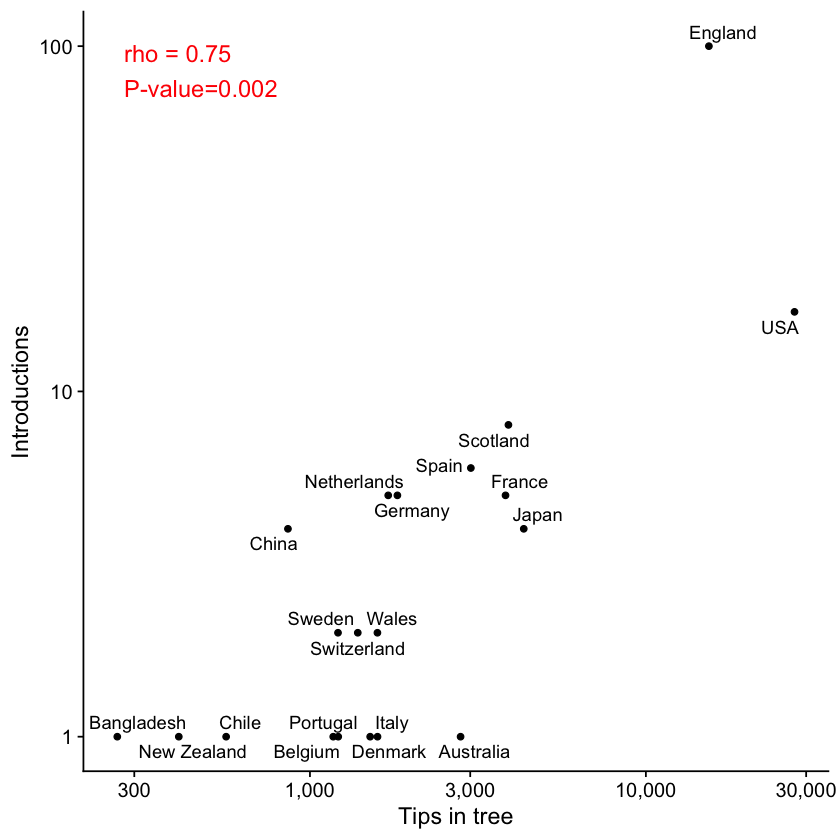

In [140]:
tips_scatter_timepoint_1 <- ggplot(timepoint_1_parent_country_frequency_distance_without_zero, aes(x=num_tips, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Tips in tree", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=280, y=85, label="rho = 0.75\nP-value=0.002",
              color="red", size=5, hjust=0)
tips_scatter_timepoint_1

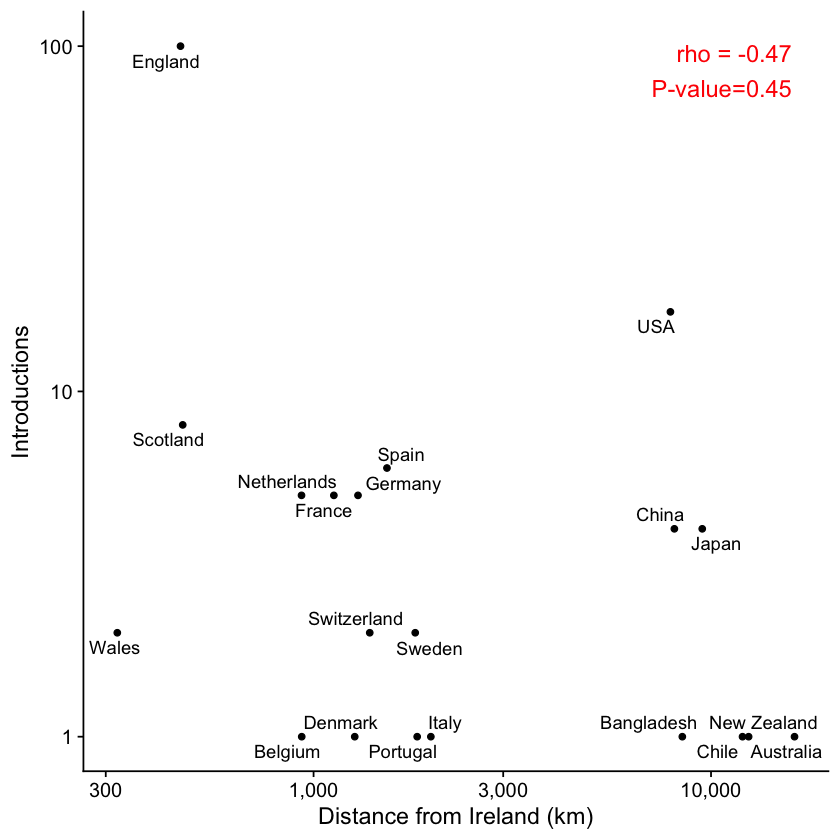

In [141]:
distance_from_ireland_timepoint_1 <- ggplot(timepoint_1_parent_country_frequency_distance_without_zero, aes(x=distance_from_ireland, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Distance from Ireland (km)", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=16000, y=85, label="rho = -0.47\nP-value=0.45",
              color="red", size=5, hjust=1)

distance_from_ireland_timepoint_1

In [16]:
cor.test(timepoint_1_parent_country_frequency_distance$distance_from_ireland, timepoint_1_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_1_parent_country_frequency_distance$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_1_parent_country_frequency_distance$distance_from_ireland and timepoint_1_parent_country_frequency_distance$Both
S = 732646, p-value = 0.004699
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2274107 


In [17]:
timepoint_1_parent_country_frequency_distance_without_zero <- timepoint_1_parent_country_frequency_distance[ which(timepoint_1_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_1_parent_country_frequency_distance_without_zero$distance_from_ireland, timepoint_1_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_1_parent_country_frequency_distance_without_zero$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_1_parent_country_frequency_distance_without_zero$distance_from_ireland and timepoint_1_parent_country_frequency_distance_without_zero$Both
S = 1952.1, p-value = 0.03754
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4677788 


In [18]:
p.adjust(p = 0.03754, n=12, method="bonferroni")

[1] 0.45048

### Timepoint B

In [19]:
timepoint_2_country_frequency <- read.csv("../outputFiles/timepoint_2_country_frequency.filteredNI.csv")
summary(timepoint_2_country_frequency)

   country               Both     
 Length:4           Min.   : 1.0  
 Class :character   1st Qu.: 1.0  
 Mode  :character   Median : 2.5  
                    Mean   :10.0  
                    3rd Qu.:11.5  
                    Max.   :34.0  

In [20]:
timepoint_2_country_frequency$prop <- timepoint_2_country_frequency$Both / sum(timepoint_2_country_frequency$Both)

In [21]:
timepoint_2_country_frequency <- timepoint_2_country_frequency %>%
  mutate(country = fct_reorder(country, desc(prop)))

In [22]:
timepoint_2_country_frequency

country,Both,prop
<fct>,<dbl>,<dbl>
Spain,1,0.025
England,34,0.850
Scotland,4,0.100
Wales,1,0.025


In [23]:
table2 <- gridExtra::tableGrob(timepoint_2_country_frequency[c('country', 'Both','prop')], theme = ttheme_minimal())

In [24]:
timepoint_2_country_frequency$TP_label <- paste0(timepoint_2_country_frequency$country, ' ', round(timepoint_2_country_frequency$prop, digits = 3) * 100, '%')

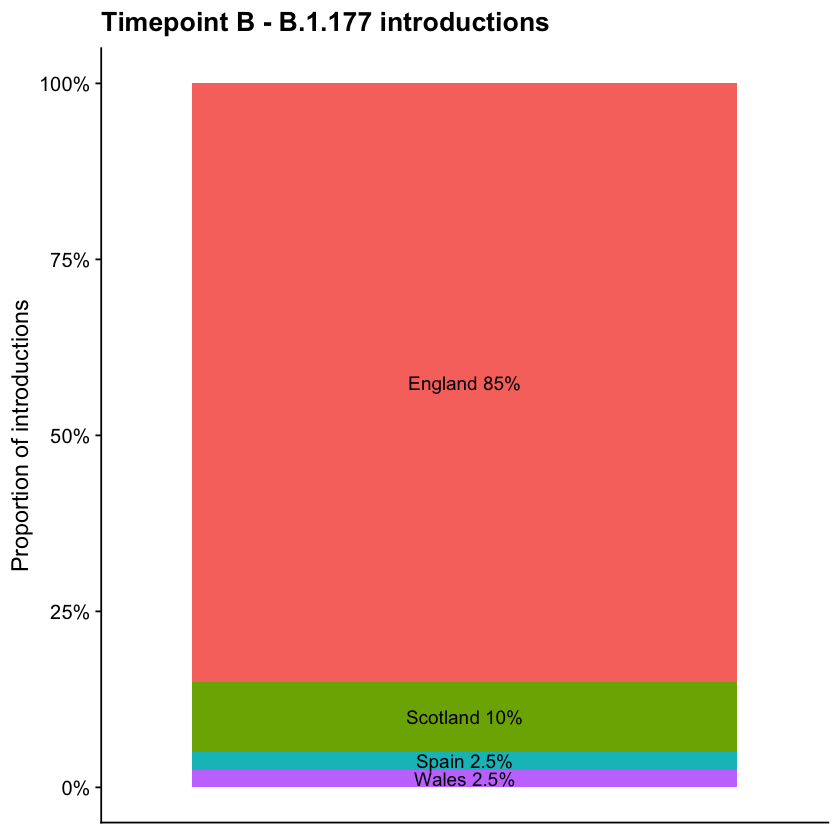

In [25]:
timepoint2_barplot <- ggplot(timepoint_2_country_frequency, aes(x="country",y=prop,fill=country, label=TP_label)) +
theme_cowplot() +
geom_col() +
geom_text(
    size=4,
    position      = position_stack(vjust=0.5)
  ) +
theme(legend.position='none', axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
labs(x = "", y = "Proportion of introductions") + scale_y_continuous(labels = scales::percent) + ggtitle("Timepoint B - B.1.177 introductions")

timepoint2_barplot

In [26]:
timepoint_2_parent_country_frequency_distance <- read.csv('../outputFiles/timepoint_2_parent_country_frequency_distance.filteredNI.csv')
summary(timepoint_2_parent_country_frequency_distance)

   longitude           latitude        country          distance_from_ireland
 Min.   :-127.764   Min.   :-43.66   Length:49          Min.   :  320.7      
 1st Qu.:  -1.465   1st Qu.: 23.97   Class :character   1st Qu.: 1674.2      
 Median :  14.891   Median : 42.00   Mode  :character   Median : 2518.1      
 Mean   :  25.851   Mean   : 35.18                      Mean   : 4760.0      
 3rd Qu.:  54.279   3rd Qu.: 52.14                      3rd Qu.: 8086.8      
 Max.   : 160.967   Max.   : 65.19                      Max.   :16220.4      
    num_tips            Both              RoI                NI         
 Min.   :    1.0   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.:    4.0   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median :   12.0   Median : 0.0000   Median : 0.0000   Median : 0.0000  
 Mean   :  641.2   Mean   : 0.8163   Mean   : 0.3469   Mean   : 0.4694  
 3rd Qu.:  143.0   3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :16351.0

In [27]:
cor.test(timepoint_2_parent_country_frequency_distance$num_tips, timepoint_2_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_2_parent_country_frequency_distance$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_2_parent_country_frequency_distance$num_tips and timepoint_2_parent_country_frequency_distance$Both
S = 10484, p-value = 0.0007589
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.465127 


In [28]:
timepoint_2_parent_country_frequency_distance_without_zero <- timepoint_2_parent_country_frequency_distance[ which(timepoint_2_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_2_parent_country_frequency_distance_without_zero$num_tips, timepoint_2_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_2_parent_country_frequency_distance_without_zero$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_2_parent_country_frequency_distance_without_zero$num_tips and timepoint_2_parent_country_frequency_distance_without_zero$Both
S = 3.6754, p-value = 0.3675
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6324555 


In [29]:
p.adjust(p = 0.3675, n=12, method="bonferroni")

[1] 1

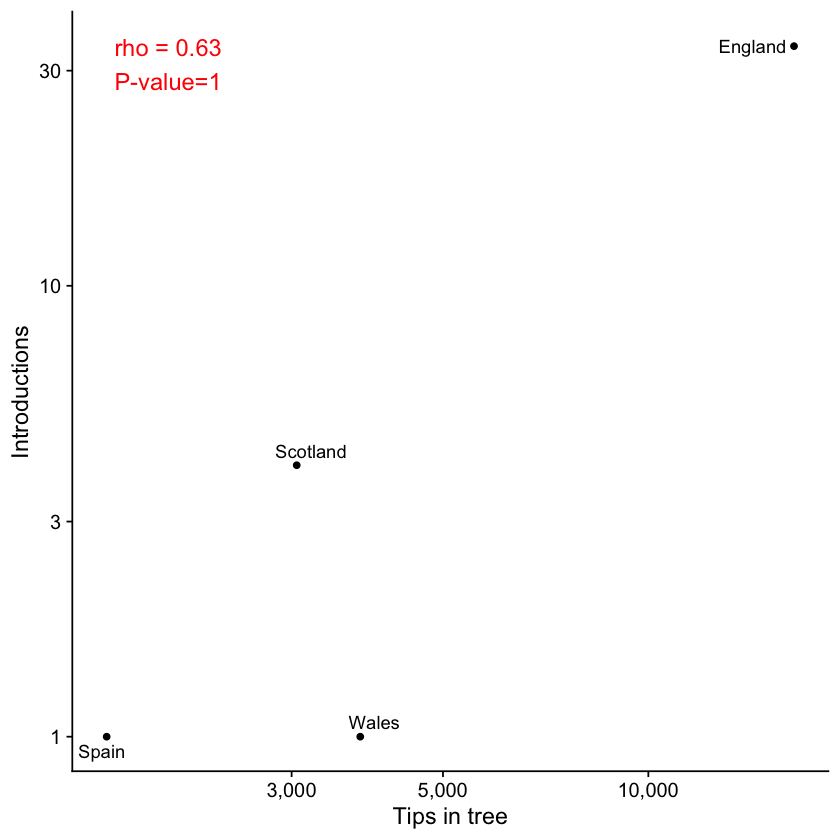

In [138]:
tips_scatter_timepoint_2 <- ggplot(timepoint_2_parent_country_frequency_distance_without_zero, aes(x=num_tips, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Tips in tree", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() + annotate(geom="text", x=1650, y=31, label="rho = 0.63\nP-value=1",
              color="red", size=5, hjust=0)
tips_scatter_timepoint_2

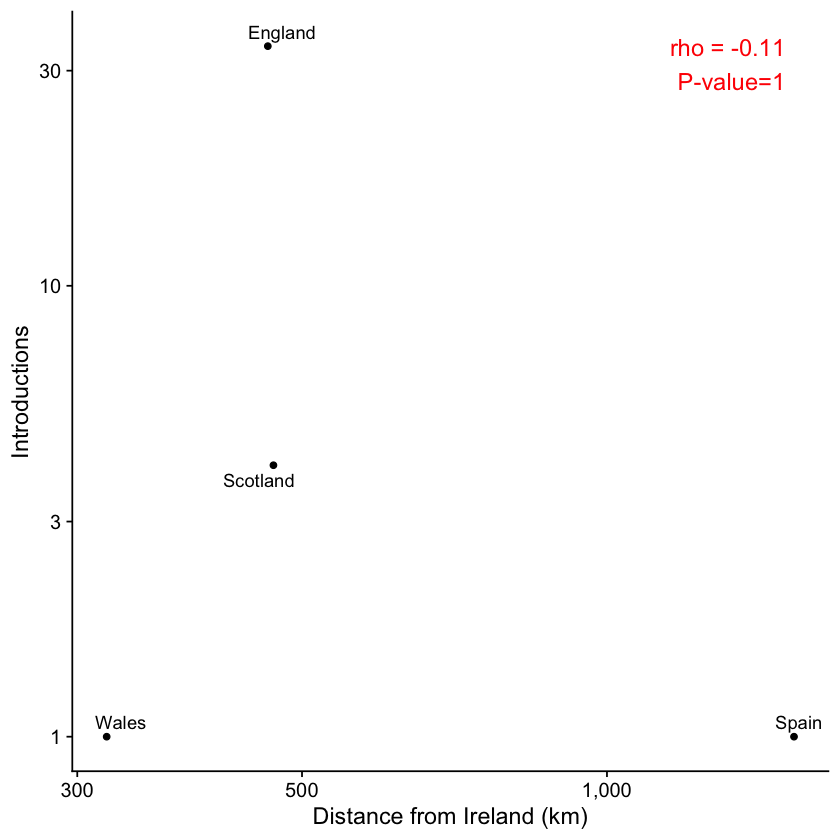

In [139]:
distance_from_ireland_timepoint_2 <- ggplot(timepoint_2_parent_country_frequency_distance_without_zero, aes(x=distance_from_ireland, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Distance from Ireland (km)", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel()+
annotate(geom="text", x=1500, y=31, label="rho = -0.11\nP-value=1",
              color="red", size=5, hjust=1)
distance_from_ireland_timepoint_2

In [31]:
cor.test(timepoint_2_parent_country_frequency_distance$distance_from_ireland, timepoint_2_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_2_parent_country_frequency_distance$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_2_parent_country_frequency_distance$distance_from_ireland and timepoint_2_parent_country_frequency_distance$Both
S = 28098, p-value = 0.001858
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4335643 


In [32]:
timepoint_2_parent_country_frequency_distance_without_zero <- timepoint_2_parent_country_frequency_distance[ which(timepoint_2_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_2_parent_country_frequency_distance_without_zero$distance_from_ireland, timepoint_2_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_2_parent_country_frequency_distance_without_zero$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_2_parent_country_frequency_distance_without_zero$distance_from_ireland and timepoint_2_parent_country_frequency_distance_without_zero$Both
S = 11.054, p-value = 0.8946
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1054093 


### Timepoint C

In [34]:
timepoint_3_country_frequency <- read.csv("../outputFiles/timepoint_3_country_frequency.filteredNI.csv")
summary(timepoint_3_country_frequency)

   country               Both       
 Length:16          Min.   :  1.00  
 Class :character   1st Qu.:  1.00  
 Mode  :character   Median :  2.50  
                    Mean   : 13.56  
                    3rd Qu.:  4.00  
                    Max.   :176.00  

In [35]:
timepoint_3_country_frequency$prop <- timepoint_3_country_frequency$Both / sum(timepoint_3_country_frequency$Both)

In [36]:
timepoint_3_country_frequency <- timepoint_3_country_frequency %>%
  mutate(country = fct_reorder(country, desc(prop)))

In [37]:
timepoint_3_country_frequency

country,Both,prop
<fct>,<dbl>,<dbl>
Portugal,1,0.004608295
Iraq,1,0.004608295
Turkey,1,0.004608295
USA,5,0.023041475
France,4,0.018433180
Switzerland,3,0.013824885
Belgium,1,0.004608295
Germany,9,0.041474654
Croatia,1,0.004608295


In [38]:
table3 <- gridExtra::tableGrob(timepoint_3_country_frequency[c('country', 'Both','prop')], theme = ttheme_minimal())

In [44]:
timepoint_3_country_frequency$TP_label <- paste0(timepoint_3_country_frequency$country, ' ', round(timepoint_3_country_frequency$prop, digits = 3) * 100, '%')

In [45]:
timepoint_3_country_frequency[ which(timepoint_3_country_frequency$prop<0.022), ]$TP_label <- NA

Warning message:
“Removed 13 rows containing missing values (geom_text).”


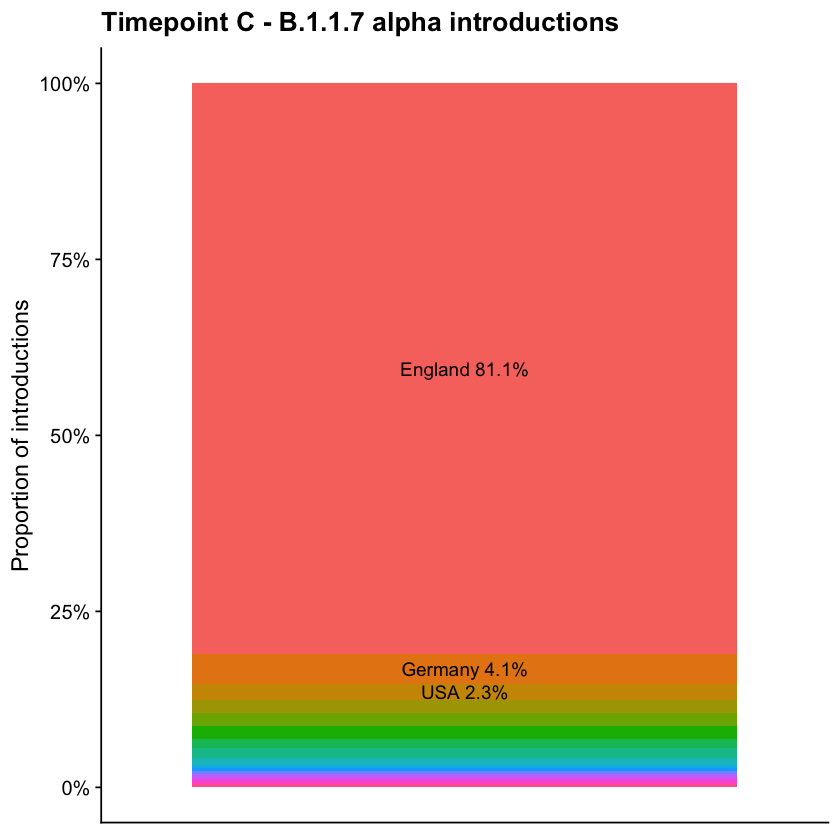

In [46]:
timepoint3_barplot <- ggplot(timepoint_3_country_frequency, aes(x="country",y=prop,fill=country, label=TP_label)) +
theme_cowplot() +
geom_col() +
geom_text(
    size=4,
    position      = position_stack(vjust=0.5)
  ) +
theme(legend.position='none', axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
labs(x = "", y = "Proportion of introductions") + scale_y_continuous(labels = scales::percent) + ggtitle("Timepoint C - B.1.1.7 alpha introductions")

timepoint3_barplot

In [47]:
timepoint_3_parent_country_frequency_distance <- read.csv('../outputFiles/timepoint_3_parent_country_frequency_distance.filteredNI.csv')
summary(timepoint_3_parent_country_frequency_distance)

   longitude           latitude         country          distance_from_ireland
 Min.   :-127.764   Min.   :-43.657   Length:135         Min.   :  320.7      
 1st Qu.:  -4.765   1st Qu.:  9.556   Class :character   1st Qu.: 2414.2      
 Median :  19.295   Median : 25.319   Mode  :character   Median : 5083.7      
 Mean   :  17.980   Mean   : 24.047                      Mean   : 5534.9      
 3rd Qu.:  43.606   3rd Qu.: 43.284                      3rd Qu.: 7995.2      
 Max.   : 178.695   Max.   : 65.187                      Max.   :16220.4      
    num_tips            Both              RoI                NI         
 Min.   :    1.0   Min.   :  0.000   Min.   :  0.000   Min.   : 0.0000  
 1st Qu.:    5.0   1st Qu.:  0.000   1st Qu.:  0.000   1st Qu.: 0.0000  
 Median :   22.0   Median :  0.000   Median :  0.000   Median : 0.0000  
 Mean   : 1331.7   Mean   :  1.607   Mean   :  1.281   Mean   : 0.3259  
 3rd Qu.:  188.5   3rd Qu.:  0.000   3rd Qu.:  0.000   3rd Qu.: 0.0000  
 Max.   :

In [48]:
cor.test(timepoint_3_parent_country_frequency_distance$num_tips, timepoint_3_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_3_parent_country_frequency_distance$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_3_parent_country_frequency_distance$num_tips and timepoint_3_parent_country_frequency_distance$Both
S = 205936, p-value = 8.132e-10
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4977654 


In [49]:
timepoint_3_parent_country_frequency_distance_without_zero <- timepoint_3_parent_country_frequency_distance[ which(timepoint_3_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_3_parent_country_frequency_distance_without_zero$num_tips, timepoint_3_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_3_parent_country_frequency_distance_without_zero$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_3_parent_country_frequency_distance_without_zero$num_tips and timepoint_3_parent_country_frequency_distance_without_zero$Both
S = 99.344, p-value = 2.565e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8539058 


In [50]:
p.adjust(p = 2.565e-05, n=12, method="bonferroni")

[1] 0.0003078

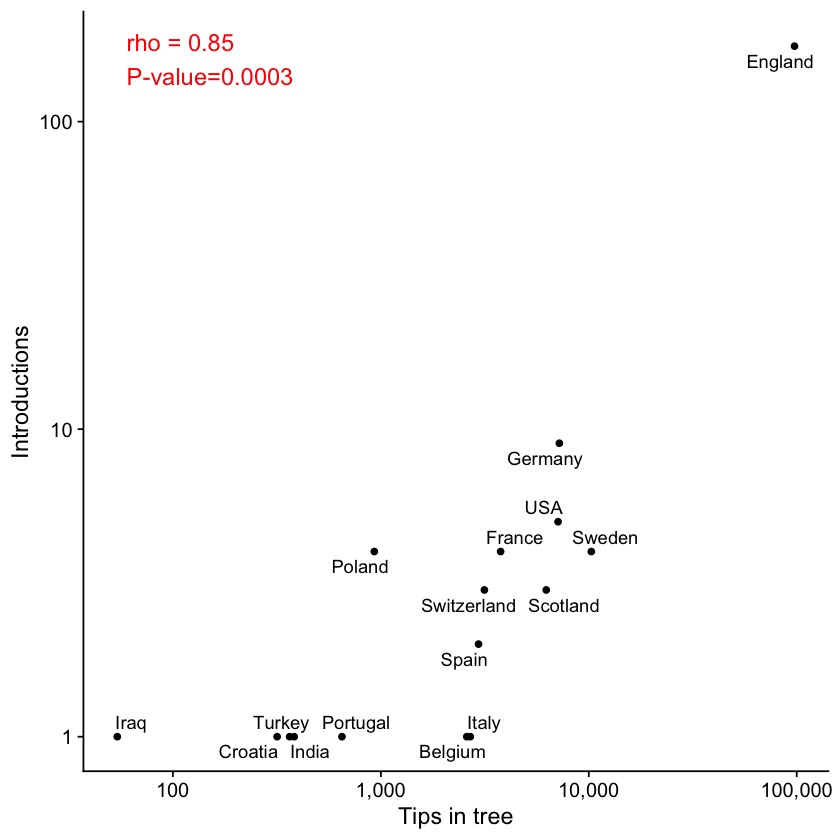

In [142]:
tips_scatter_timepoint_3 <- ggplot(timepoint_3_parent_country_frequency_distance_without_zero, aes(x=num_tips, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Tips in tree", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=60, y=160, label="rho = 0.85\nP-value=0.0003",
              color="red", size=5, hjust=0)
tips_scatter_timepoint_3

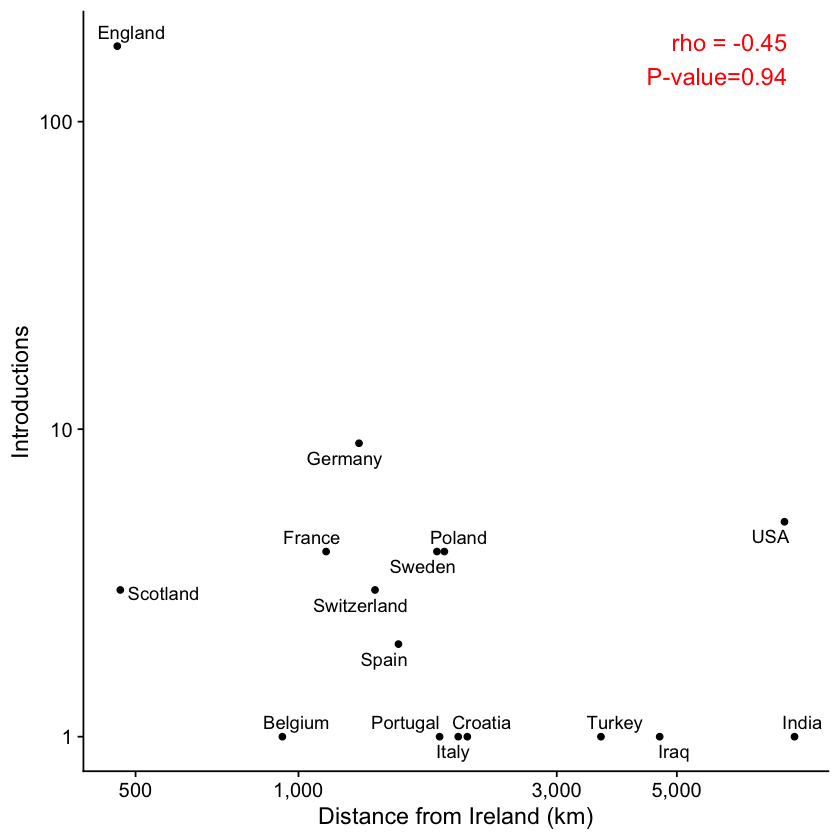

In [143]:
distance_from_ireland_timepoint_3 <- ggplot(timepoint_3_parent_country_frequency_distance_without_zero, aes(x=distance_from_ireland, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Distance from Ireland (km)", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=8000, y=160, label="rho = -0.45\nP-value=0.94",
              color="red", size=5, hjust=1)

distance_from_ireland_timepoint_3

In [52]:
cor.test(timepoint_3_parent_country_frequency_distance$distance_from_ireland, timepoint_3_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_3_parent_country_frequency_distance$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_3_parent_country_frequency_distance$distance_from_ireland and timepoint_3_parent_country_frequency_distance$Both
S = 560734, p-value = 1.161e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3675102 


In [53]:
timepoint_3_parent_country_frequency_distance_without_zero <- timepoint_3_parent_country_frequency_distance[ which(timepoint_3_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_3_parent_country_frequency_distance_without_zero$distance_from_ireland, timepoint_3_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_3_parent_country_frequency_distance_without_zero$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_3_parent_country_frequency_distance_without_zero$distance_from_ireland and timepoint_3_parent_country_frequency_distance_without_zero$Both
S = 988.15, p-value = 0.07794
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4531558 


In [54]:
p.adjust(p = 0.07794, n=12, method="bonferroni")

[1] 0.93528

Warning message:
“Removed 13 rows containing missing values (geom_text).”
Warning message:
“Removed 13 rows containing missing values (geom_text).”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


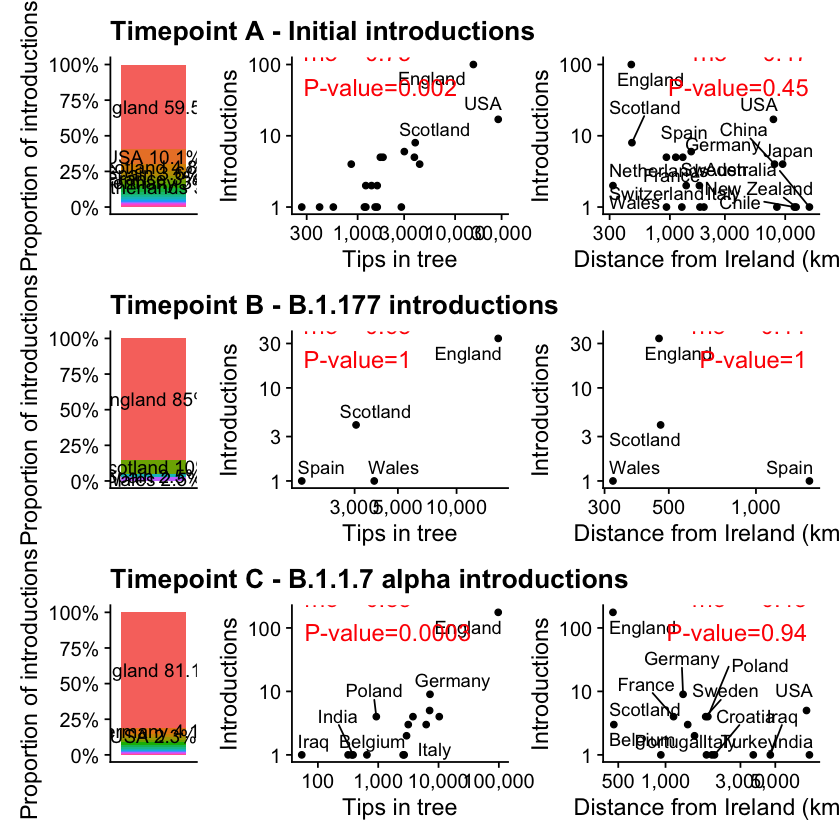

In [144]:
timepoint_abc_plot <- timepoint1_barplot + tips_scatter_timepoint_1 + distance_from_ireland_timepoint_1 + timepoint2_barplot + tips_scatter_timepoint_2 + distance_from_ireland_timepoint_2 + timepoint3_barplot + tips_scatter_timepoint_3 + distance_from_ireland_timepoint_3 +
  plot_layout(ncol = 3, widths = c(1.2, 3, 3))
timepoint_abc_plot

In [145]:
ggsave('../outputFiles/figures/timepoint_abc_multipanel.svg', width=32, height=36, units = "cm")

Warning message:
“Removed 13 rows containing missing values (geom_text).”
Warning message:
“Removed 13 rows containing missing values (geom_text).”


In [146]:
ggsave('../outputFiles/figures/timepoint_abc_multipanel.pdf', width=32, height=36, units = "cm")

Warning message:
“Removed 13 rows containing missing values (geom_text).”
Warning message:
“Removed 13 rows containing missing values (geom_text).”


### Timepoint D

In [59]:
timepoint_4_country_frequency <- read.csv("../outputFiles/timepoint_4_country_frequency.filteredNI.csv")
summary(timepoint_4_country_frequency)

   country               Both       
 Length:34          Min.   :  1.00  
 Class :character   1st Qu.:  1.00  
 Mode  :character   Median :  3.00  
                    Mean   : 21.06  
                    3rd Qu.: 11.75  
                    Max.   :473.00  

In [60]:
timepoint_4_country_frequency$prop <- timepoint_4_country_frequency$Both / sum(timepoint_4_country_frequency$Both)

In [61]:
timepoint_4_country_frequency <- timepoint_4_country_frequency %>%
  mutate(country = fct_reorder(country, desc(prop)))

In [62]:
timepoint_4_country_frequency

country,Both,prop
<fct>,<dbl>,<dbl>
Portugal,3,0.004189944
Iceland,2,0.002793296
Kenya,1,0.001396648
Namibia,1,0.001396648
South Africa,1,0.001396648
Zimbabwe,1,0.001396648
Nigeria,3,0.004189944
Greece,6,0.008379888
Israel,1,0.001396648


In [63]:
table4 <- gridExtra::tableGrob(timepoint_4_country_frequency[c('country', 'Both','prop')], theme = ttheme_minimal())

In [67]:
timepoint_4_country_frequency$TP_label <- paste0(timepoint_4_country_frequency$country, ' ', round(timepoint_4_country_frequency$prop, digits = 3) * 100, '%')

In [68]:
timepoint_4_country_frequency[ which(timepoint_4_country_frequency$prop<0.020), ]$TP_label <- NA

Warning message:
“Removed 29 rows containing missing values (geom_text).”


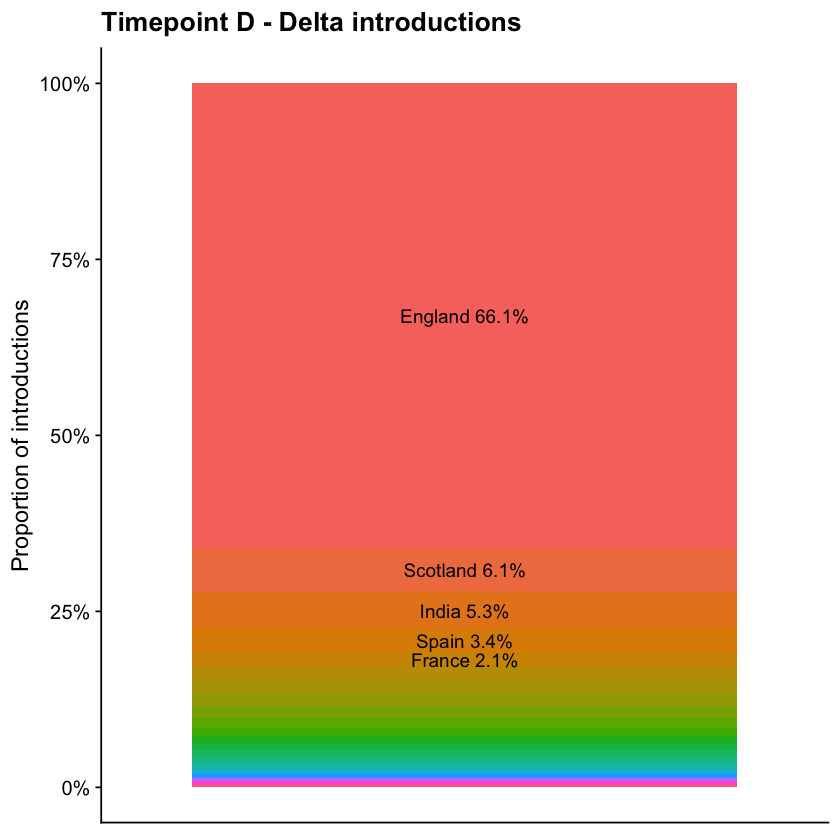

In [69]:
timepoint4_barplot <- ggplot(timepoint_4_country_frequency, aes(x="country",y=prop,fill=country, label=TP_label)) +
theme_cowplot() +
geom_col() +
geom_text(
    size=4,
    position      = position_stack(vjust=0.5)
  ) +
theme(legend.position='none', axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
labs(x = "", y = "Proportion of introductions") + scale_y_continuous(labels = scales::percent) + ggtitle("Timepoint D - Delta introductions")

timepoint4_barplot

In [70]:
timepoint_4_parent_country_frequency_distance <- read.csv('../outputFiles/timepoint_4_parent_country_frequency_distance.filteredNI.csv')
summary(timepoint_4_parent_country_frequency_distance)

   longitude          latitude         country          distance_from_ireland
 Min.   :-145.26   Min.   :-43.657   Length:160         Min.   :  320.7      
 1st Qu.: -10.62   1st Qu.:  6.044   Class :character   1st Qu.: 2704.4      
 Median :  18.86   Median : 19.033   Mode  :character   Median : 6157.9      
 Mean   :  16.46   Mean   : 20.700                      Mean   : 6101.0      
 3rd Qu.:  45.77   3rd Qu.: 42.251                      3rd Qu.: 8419.7      
 Max.   : 178.70   Max.   : 65.187                      Max.   :16220.4      
    num_tips             Both              RoI                NI         
 Min.   :     1.0   Min.   :  0.000   Min.   :  0.000   Min.   :  0.000  
 1st Qu.:    18.0   1st Qu.:  0.000   1st Qu.:  0.000   1st Qu.:  0.000  
 Median :    75.5   Median :  0.000   Median :  0.000   Median :  0.000  
 Mean   :  3161.8   Mean   :  4.475   Mean   :  2.781   Mean   :  1.694  
 3rd Qu.:   551.0   3rd Qu.:  0.000   3rd Qu.:  0.000   3rd Qu.:  0.000  
 Max.   :1

In [71]:
cor.test(timepoint_4_parent_country_frequency_distance$num_tips, timepoint_4_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_4_parent_country_frequency_distance$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_4_parent_country_frequency_distance$num_tips and timepoint_4_parent_country_frequency_distance$Both
S = 274267, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5982255 


In [72]:
timepoint_4_parent_country_frequency_distance_without_zero <- timepoint_4_parent_country_frequency_distance[ which(timepoint_4_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_4_parent_country_frequency_distance_without_zero$num_tips, timepoint_4_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_4_parent_country_frequency_distance_without_zero$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_4_parent_country_frequency_distance_without_zero$num_tips and timepoint_4_parent_country_frequency_distance_without_zero$Both
S = 1517.3, p-value = 1.135e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7681734 


In [73]:
p.adjust(p = 1.135e-07, n=12, method="bonferroni")

[1] 1.362e-06

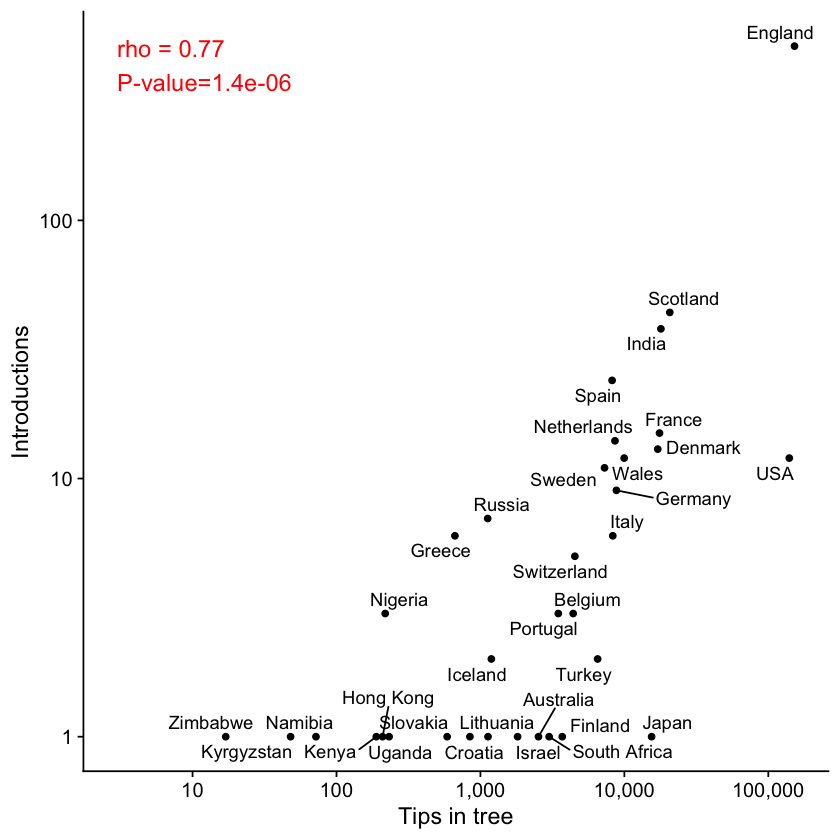

In [133]:
tips_scatter_timepoint_4 <- ggplot(timepoint_4_parent_country_frequency_distance_without_zero, aes(x=num_tips, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Tips in tree", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=3, y=400, label="rho = 0.77\nP-value=1.4e-06",
              color="red", size=5, hjust=0)
tips_scatter_timepoint_4

Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


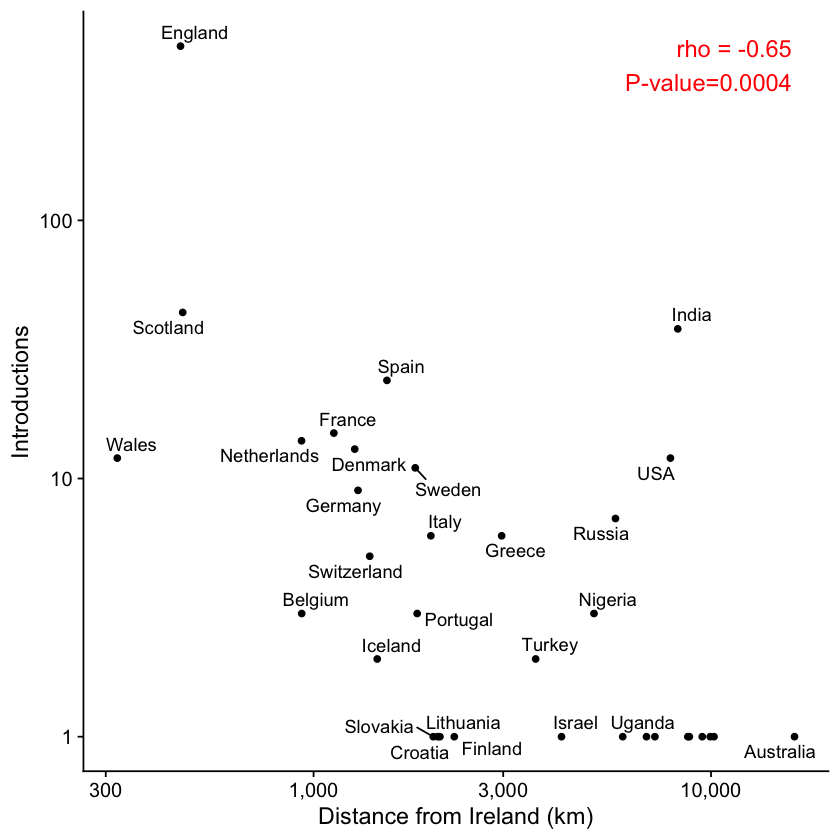

In [134]:
distance_from_ireland_timepoint_4 <- ggplot(timepoint_4_parent_country_frequency_distance_without_zero, aes(x=distance_from_ireland, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Distance from Ireland (km)", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel()+
annotate(geom="text", x=16000, y=400, label="rho = -0.65\nP-value=0.0004",
              color="red", size=5, hjust=1)

distance_from_ireland_timepoint_4

In [78]:
cor.test(timepoint_4_parent_country_frequency_distance$distance_from_ireland, timepoint_4_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_4_parent_country_frequency_distance$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_4_parent_country_frequency_distance$distance_from_ireland and timepoint_4_parent_country_frequency_distance$Both
S = 905234, p-value = 2.578e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3260787 


In [79]:
timepoint_4_parent_country_frequency_distance_without_zero <- timepoint_4_parent_country_frequency_distance[ which(timepoint_4_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_4_parent_country_frequency_distance_without_zero$distance_from_ireland, timepoint_4_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_4_parent_country_frequency_distance_without_zero$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_4_parent_country_frequency_distance_without_zero$distance_from_ireland and timepoint_4_parent_country_frequency_distance_without_zero$Both
S = 10791, p-value = 3.336e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6486763 


In [80]:
p.adjust(p = 3.336e-05, n=12, method="bonferroni")

[1] 0.00040032

In [82]:
timepoint_4_table <- timepoint_4_parent_country_frequency_distance_without_zero[c('country', "RoI", "NI")]
rownames(timepoint_4_table) <- timepoint_4_table[,1]
timepoint_4_table[,1] <- NULL
timepoint_4_table

,RoI,NI
,<dbl>,<dbl>
Portugal,2,1
Iceland,2,0
Kenya,1,0
Namibia,1,0
South Africa,1,0
Zimbabwe,1,0
Nigeria,3,0
Greece,6,0
Israel,1,0


In [83]:
(Xsq <- fisher.test(timepoint_4_table, simulate.p.value = TRUE, B=1000000))
Xsq


	Fisher's Exact Test for Count Data with simulated p-value (based on
	1e+06 replicates)

data:  timepoint_4_table
p-value = 1e-06
alternative hypothesis: two.sided



	Fisher's Exact Test for Count Data with simulated p-value (based on
	1e+06 replicates)

data:  timepoint_4_table
p-value = 1e-06
alternative hypothesis: two.sided


In [84]:
Xsq$p.value

[1] 9.99999e-07

In [85]:
(Xsq <- chisq.test(timepoint_4_table))
Xsq$observed
Xsq$expected
Xsq$stdres

Warning message in chisq.test(timepoint_4_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  timepoint_4_table
X-squared = 120.26, df = 33, p-value = 7.471e-12


,RoI,NI
Portugal,2,1
Iceland,2,0
Kenya,1,0
Namibia,1,0
South Africa,1,0
Zimbabwe,1,0
Nigeria,3,0
Greece,6,0
Israel,1,0
Turkey,2,0


,RoI,NI
Portugal,1.8645251,1.1354749
Iceland,1.2430168,0.7569832
Kenya,0.6215084,0.3784916
Namibia,0.6215084,0.3784916
South Africa,0.6215084,0.3784916
Zimbabwe,0.6215084,0.3784916
Nigeria,1.8645251,1.1354749
Greece,3.7290503,2.2709497
Israel,0.6215084,0.3784916
Turkey,1.2430168,0.7569832


,RoI,NI
Portugal,0.1616063,-0.1616063
Iceland,1.1051648,-1.1051648
Kenya,0.7809228,-0.7809228
Namibia,0.7809228,-0.7809228
South Africa,0.7809228,-0.7809228
Zimbabwe,0.7809228,-0.7809228
Nigeria,1.3544938,-1.3544938
Greece,1.9195861,-1.9195861
Israel,0.7809228,-0.7809228
Turkey,1.1051648,-1.1051648


In [86]:
Xsq$stdres %>% as.data.frame()   %>% 
        arrange(desc(RoI))

,RoI,NI
,<dbl>,<dbl>
Spain,3.4606822,-3.4606822
India,3.2249666,-3.2249666
France,3.0545537,-3.0545537
Netherlands,2.9488767,-2.9488767
USA,2.7262485,-2.7262485
Sweden,2.6083324,-2.6083324
Germany,2.3559860,-2.3559860
Denmark,2.2624810,-2.2624810
Greece,1.9195861,-1.9195861


### Timepoint E

In [87]:
timepoint_5_country_frequency <- read.csv("../outputFiles/timepoint_5_country_frequency.filteredNI.csv")
summary(timepoint_5_country_frequency)

   country               Both       
 Length:47          Min.   :  1.00  
 Class :character   1st Qu.:  1.00  
 Mode  :character   Median :  3.00  
                    Mean   : 40.94  
                    3rd Qu.:  8.50  
                    Max.   :973.00  

In [88]:
timepoint_5_country_frequency$prop <- timepoint_5_country_frequency$Both / sum(timepoint_5_country_frequency$Both)

In [89]:
timepoint_5_country_frequency <- timepoint_5_country_frequency %>%
  mutate(country = fct_reorder(country, desc(prop)))

In [90]:
timepoint_5_country_frequency

country,Both,prop
<fct>,<dbl>,<dbl>
Mexico,1,0.0005197505
Canada,25,0.0129937630
Argentina,1,0.0005197505
Peru,2,0.0010395010
Brazil,13,0.0067567568
Costa Rica,1,0.0005197505
Ghana,1,0.0005197505
Portugal,4,0.0020790021
South Africa,7,0.0036382536


In [91]:
table5 <- gridExtra::tableGrob(timepoint_5_country_frequency[c('country', 'Both','prop')], theme = ttheme_minimal())

In [95]:
timepoint_5_country_frequency$TP_label <- paste0(timepoint_5_country_frequency$country, ' ', round(timepoint_5_country_frequency$prop, digits = 3) * 100, '%')

In [96]:
timepoint_5_country_frequency[ which(timepoint_5_country_frequency$prop<0.022), ]$TP_label <- NA

Warning message:
“Removed 43 rows containing missing values (geom_text).”


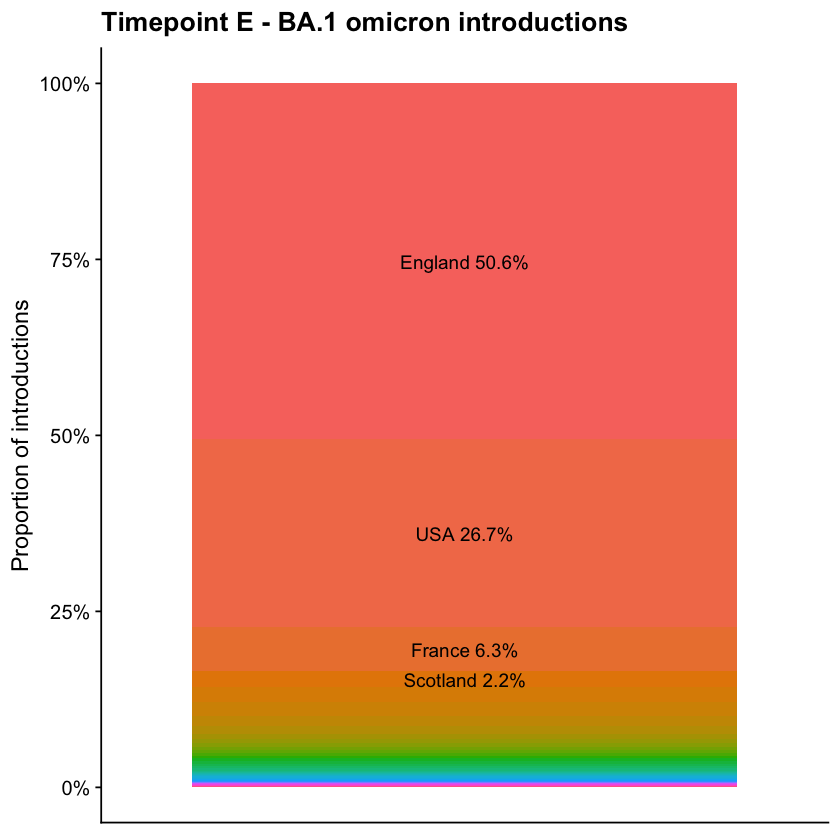

In [97]:
timepoint5_barplot <- ggplot(timepoint_5_country_frequency, aes(x="country",y=prop,fill=country, label=TP_label)) +
theme_cowplot() +
geom_col() +
geom_text(
    size=4,
    position      = position_stack(vjust=0.5)
  ) +
theme(legend.position='none', axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
labs(x = "", y = "Proportion of introductions") + scale_y_continuous(labels = scales::percent) + ggtitle("Timepoint E - BA.1 omicron introductions")

timepoint5_barplot

In [98]:
timepoint_5_parent_country_frequency_distance <- read.csv('../outputFiles/timepoint_5_parent_country_frequency_distance.filteredNI.csv')
summary(timepoint_5_parent_country_frequency_distance)

   longitude          latitude         country          distance_from_ireland
 Min.   :-170.70   Min.   :-43.657   Length:162         Min.   :  320.7      
 1st Qu.: -22.18   1st Qu.:  6.303   Class :character   1st Qu.: 2812.4      
 Median :  19.42   Median : 18.601   Mode  :character   Median : 6245.7      
 Mean   :  12.20   Mean   : 20.470                      Mean   : 6136.9      
 3rd Qu.:  43.83   3rd Qu.: 41.279                      3rd Qu.: 8423.4      
 Max.   : 148.18   Max.   : 65.187                      Max.   :16220.4      
    num_tips             Both             RoI               NI         
 Min.   :     1.0   Min.   :  0.00   Min.   :  0.00   Min.   :  0.000  
 1st Qu.:    28.2   1st Qu.:  0.00   1st Qu.:  0.00   1st Qu.:  0.000  
 Median :   123.0   Median :  0.00   Median :  0.00   Median :  0.000  
 Mean   :  8037.8   Mean   : 11.88   Mean   :  8.13   Mean   :  3.747  
 3rd Qu.:  1554.0   3rd Qu.:  1.00   3rd Qu.:  1.00   3rd Qu.:  0.000  
 Max.   :470629.0   Ma

In [99]:
cor.test(timepoint_5_parent_country_frequency_distance$num_tips, timepoint_5_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_5_parent_country_frequency_distance$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_5_parent_country_frequency_distance$num_tips and timepoint_5_parent_country_frequency_distance$Both
S = 206232, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.708942 


In [100]:
timepoint_5_parent_country_frequency_distance_without_zero <- timepoint_5_parent_country_frequency_distance[ which(timepoint_5_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_5_parent_country_frequency_distance_without_zero$num_tips, timepoint_5_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_5_parent_country_frequency_distance_without_zero$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_5_parent_country_frequency_distance_without_zero$num_tips and timepoint_5_parent_country_frequency_distance_without_zero$Both
S = 3647.6, p-value = 4.428e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7891046 


In [101]:
p.adjust(p = 4.428e-11, n=12, method="bonferroni")

[1] 5.3136e-10

Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


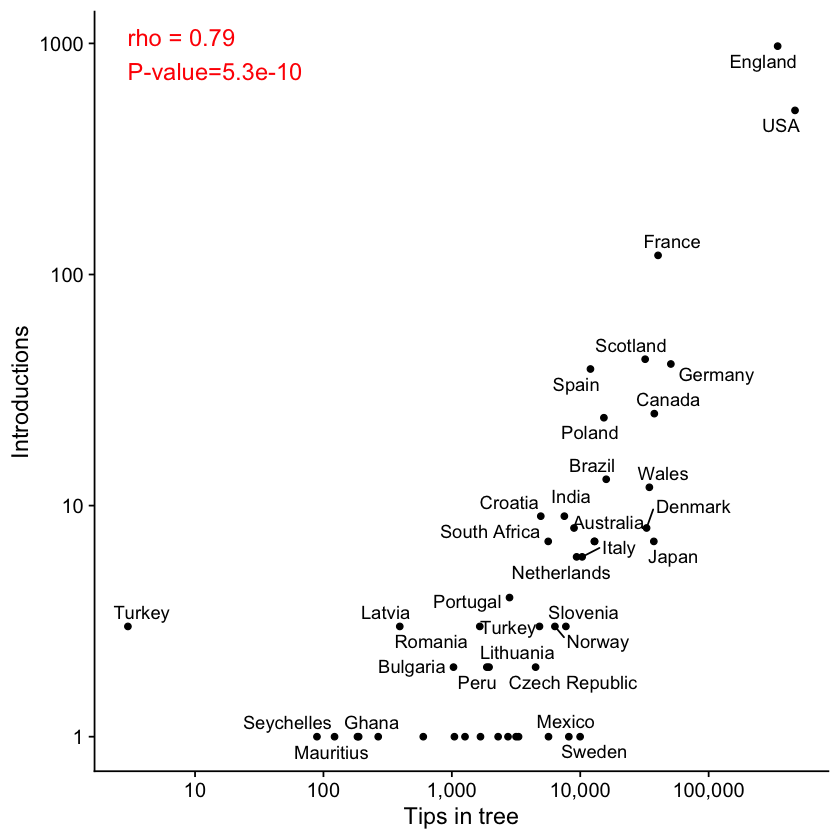

In [102]:
tips_scatter_timepoint_5 <- ggplot(timepoint_5_parent_country_frequency_distance_without_zero, aes(x=num_tips, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Tips in tree", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=3, y=900, label="rho = 0.79\nP-value=5.3e-10",
              color="red", size=5, hjust=0)
tips_scatter_timepoint_5

Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


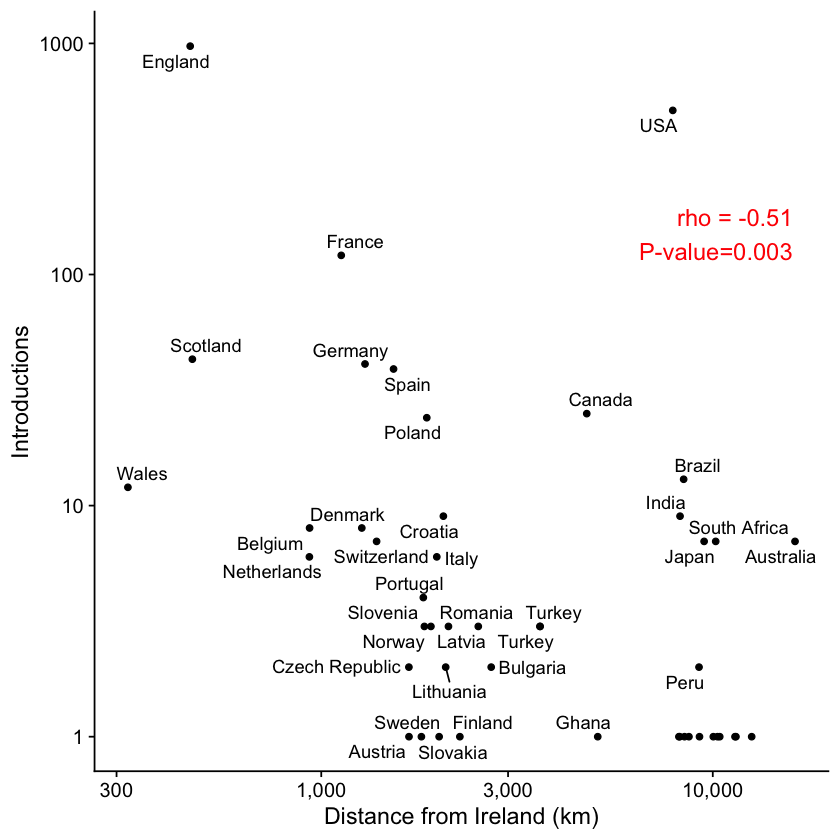

In [106]:
distance_from_ireland_timepoint_5 <- ggplot(timepoint_5_parent_country_frequency_distance_without_zero, aes(x=distance_from_ireland, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Distance from Ireland (km)", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=16000, y=150, label="rho = -0.51\nP-value=0.003",
              color="red", size=5, hjust=1)

distance_from_ireland_timepoint_5

In [103]:
cor.test(timepoint_5_parent_country_frequency_distance$distance_from_ireland, timepoint_5_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_5_parent_country_frequency_distance$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_5_parent_country_frequency_distance$distance_from_ireland and timepoint_5_parent_country_frequency_distance$Both
S = 901666, p-value = 0.0004506
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2725306 


In [104]:
timepoint_5_parent_country_frequency_distance_without_zero <- timepoint_5_parent_country_frequency_distance[ which(timepoint_5_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_5_parent_country_frequency_distance_without_zero$distance_from_ireland, timepoint_5_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_5_parent_country_frequency_distance_without_zero$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_5_parent_country_frequency_distance_without_zero$distance_from_ireland and timepoint_5_parent_country_frequency_distance_without_zero$Both
S = 26161, p-value = 0.00023
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.5125724 


In [105]:
p.adjust(p = 0.00023, n=12, method="bonferroni")

[1] 0.00276

### Timepoint F

In [107]:
timepoint_6_country_frequency <- read.csv("../outputFiles/timepoint_6_country_frequency.filteredNI.csv")
summary(timepoint_6_country_frequency)

   country               Both       
 Length:30          Min.   :  1.00  
 Class :character   1st Qu.:  1.00  
 Mode  :character   Median :  4.00  
                    Mean   : 42.87  
                    3rd Qu.: 16.75  
                    Max.   :779.00  

In [108]:
timepoint_6_country_frequency$prop <- timepoint_6_country_frequency$Both / sum(timepoint_6_country_frequency$Both)

In [109]:
timepoint_6_country_frequency <- timepoint_6_country_frequency %>%
  mutate(country = fct_reorder(country, desc(prop)))

In [110]:
timepoint_6_country_frequency

country,Both,prop
<fct>,<dbl>,<dbl>
Portugal,1,0.000777605
New Zealand,1,0.000777605
Israel,5,0.003888025
USA,13,0.010108865
France,18,0.013996890
Switzerland,27,0.020995334
Belgium,2,0.001555210
Germany,78,0.060653188
Netherlands,10,0.007776050


In [111]:
table6 <- gridExtra::tableGrob(timepoint_6_country_frequency[c('country', 'Both','prop')], theme = ttheme_minimal())

In [112]:
timepoint_6_country_frequency$TP_label <- paste0(timepoint_6_country_frequency$country, ' ', round(timepoint_6_country_frequency$prop, digits = 3) * 100, '%')

In [113]:
timepoint_6_country_frequency[ which(timepoint_6_country_frequency$prop<0.021), ]$TP_label <- NA

Warning message:
“Removed 25 rows containing missing values (geom_text).”


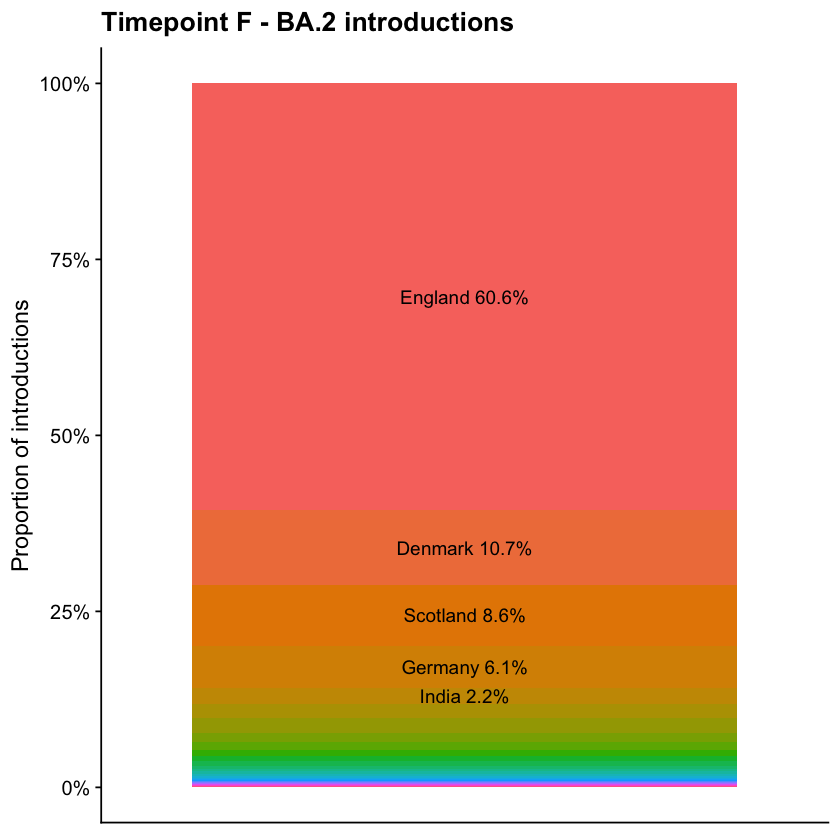

In [114]:
timepoint6_barplot <- ggplot(timepoint_6_country_frequency, aes(x="country",y=prop,fill=country, label=TP_label)) +
theme_cowplot() +
geom_col() +
geom_text(
    size=4,
    position      = position_stack(vjust=0.5)
  ) +
theme(legend.position='none', axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
labs(x = "", y = "Proportion of introductions") + scale_y_continuous(labels = scales::percent) + ggtitle("Timepoint F - BA.2 introductions")

timepoint6_barplot

In [115]:
timepoint_6_parent_country_frequency_distance <- read.csv('../outputFiles/timepoint_6_parent_country_frequency_distance.filteredNI.csv')
summary(timepoint_6_parent_country_frequency_distance)

   longitude           latitude         country          distance_from_ireland
 Min.   :-127.764   Min.   :-43.657   Length:110         Min.   :  320.7      
 1st Qu.:   6.431   1st Qu.:  7.972   Class :character   1st Qu.: 2178.2      
 Median :  25.145   Median : 28.829   Mode  :character   Median : 6133.2      
 Mean   :  28.923   Mean   : 24.090                      Mean   : 6008.8      
 3rd Qu.:  56.624   3rd Qu.: 44.523                      3rd Qu.: 9044.9      
 Max.   : 148.180   Max.   : 65.187                      Max.   :16220.4      
    num_tips              Both             RoI                NI         
 Min.   :     1.00   Min.   :  0.00   Min.   :  0.000   Min.   :  0.000  
 1st Qu.:    10.25   1st Qu.:  0.00   1st Qu.:  0.000   1st Qu.:  0.000  
 Median :    81.00   Median :  0.00   Median :  0.000   Median :  0.000  
 Mean   :  5801.12   Mean   : 11.69   Mean   :  3.745   Mean   :  7.946  
 3rd Qu.:  1322.75   3rd Qu.:  1.00   3rd Qu.:  0.000   3rd Qu.:  0.000  
 Ma

In [116]:
cor.test(timepoint_6_parent_country_frequency_distance$num_tips, timepoint_6_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_6_parent_country_frequency_distance$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_6_parent_country_frequency_distance$num_tips and timepoint_6_parent_country_frequency_distance$Both
S = 60540, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7270683 


In [117]:
timepoint_6_parent_country_frequency_distance_without_zero <- timepoint_6_parent_country_frequency_distance[ which(timepoint_6_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_6_parent_country_frequency_distance_without_zero$num_tips, timepoint_6_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_6_parent_country_frequency_distance_without_zero$num_tips, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_6_parent_country_frequency_distance_without_zero$num_tips and timepoint_6_parent_country_frequency_distance_without_zero$Both
S = 421.92, p-value = 5.641e-12
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.906135 


In [118]:
p.adjust(p = 5.641e-12, n=12, method="bonferroni")

[1] 6.7692e-11

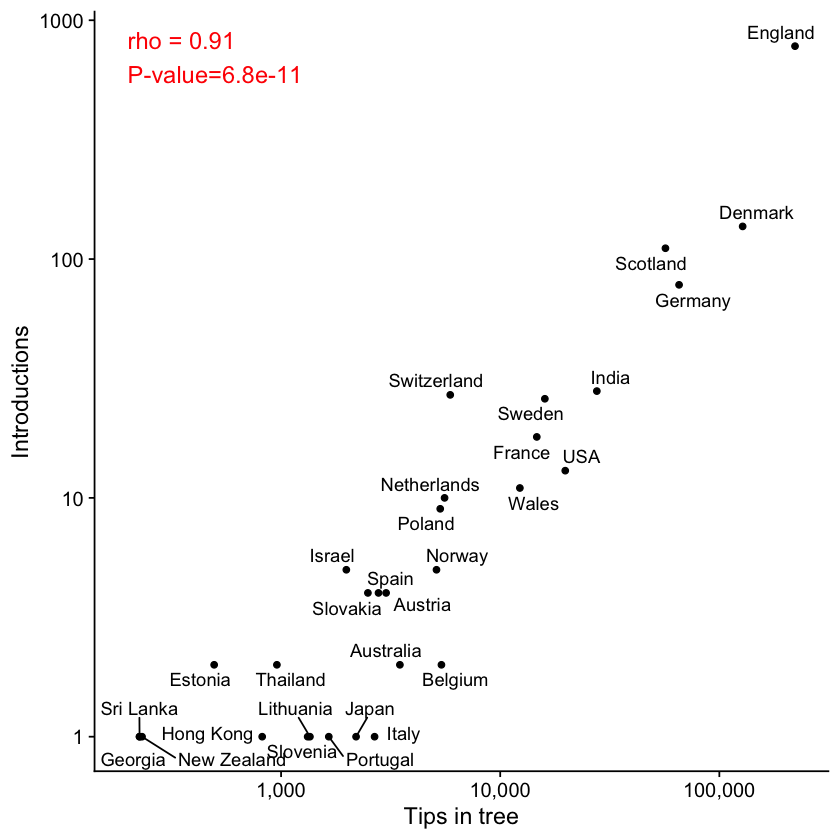

In [119]:
tips_scatter_timepoint_6 <- ggplot(timepoint_6_parent_country_frequency_distance_without_zero, aes(x=num_tips, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Tips in tree", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=200, y=700, label="rho = 0.91\nP-value=6.8e-11",
              color="red", size=5, hjust=0)
tips_scatter_timepoint_6

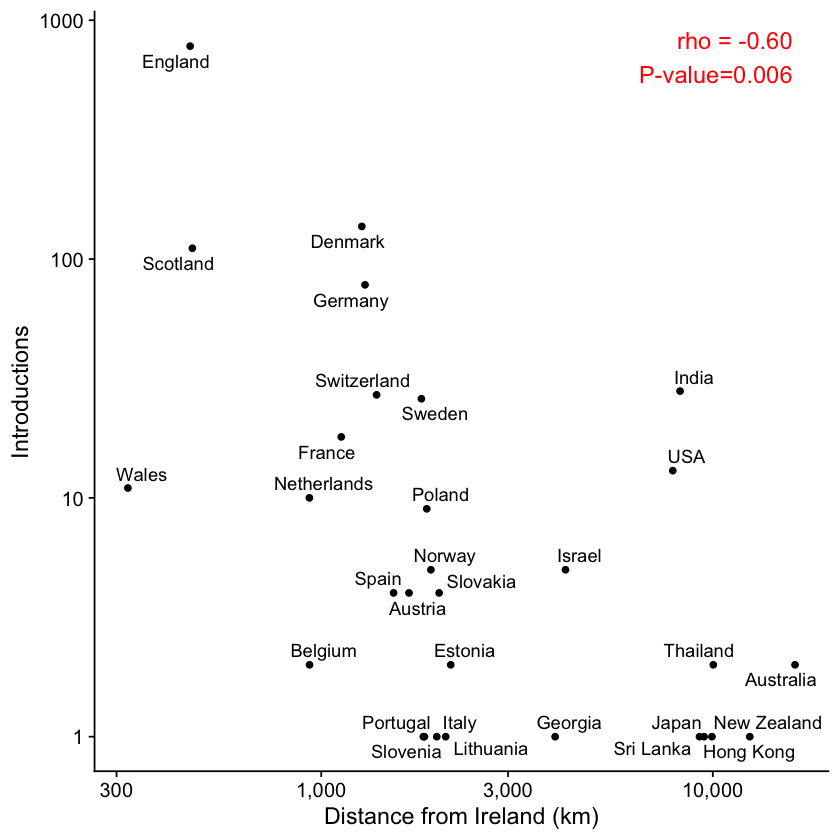

In [123]:
distance_from_ireland_timepoint_6 <- ggplot(timepoint_6_parent_country_frequency_distance_without_zero, aes(x=distance_from_ireland, y=Both, label=country)) +
theme_cowplot() +
scale_x_log10(name="Distance from Ireland (km)", labels = scales::comma) +
scale_y_log10(name="Introductions") +
  geom_point() + geom_text_repel() +
annotate(geom="text", x=16000, y=700, label="rho = -0.60\nP-value=0.006",
              color="red", size=5, hjust=1)

distance_from_ireland_timepoint_6

In [120]:
cor.test(timepoint_6_parent_country_frequency_distance$distance_from_ireland, timepoint_6_parent_country_frequency_distance$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_6_parent_country_frequency_distance$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_6_parent_country_frequency_distance$distance_from_ireland and timepoint_6_parent_country_frequency_distance$Both
S = 315427, p-value = 4.388e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4220261 


In [121]:
timepoint_6_parent_country_frequency_distance_without_zero <- timepoint_6_parent_country_frequency_distance[ which(timepoint_6_parent_country_frequency_distance$Both > 0), ]

cor.test(timepoint_6_parent_country_frequency_distance_without_zero$distance_from_ireland, timepoint_6_parent_country_frequency_distance_without_zero$Both, method=c("spearman"))

Warning message in cor.test.default(timepoint_6_parent_country_frequency_distance_without_zero$distance_from_ireland, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  timepoint_6_parent_country_frequency_distance_without_zero$distance_from_ireland and timepoint_6_parent_country_frequency_distance_without_zero$Both
S = 7171.5, p-value = 0.000518
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.5954391 


In [122]:
p.adjust(p = 0.000518, n=12, method="bonferroni")

[1] 0.006216

Warning message:
“Removed 29 rows containing missing values (geom_text).”
Warning message:
“Removed 43 rows containing missing values (geom_text).”
Warning message:
“Removed 25 rows containing missing values (geom_text).”
Warning message:
“ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 28 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 43 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


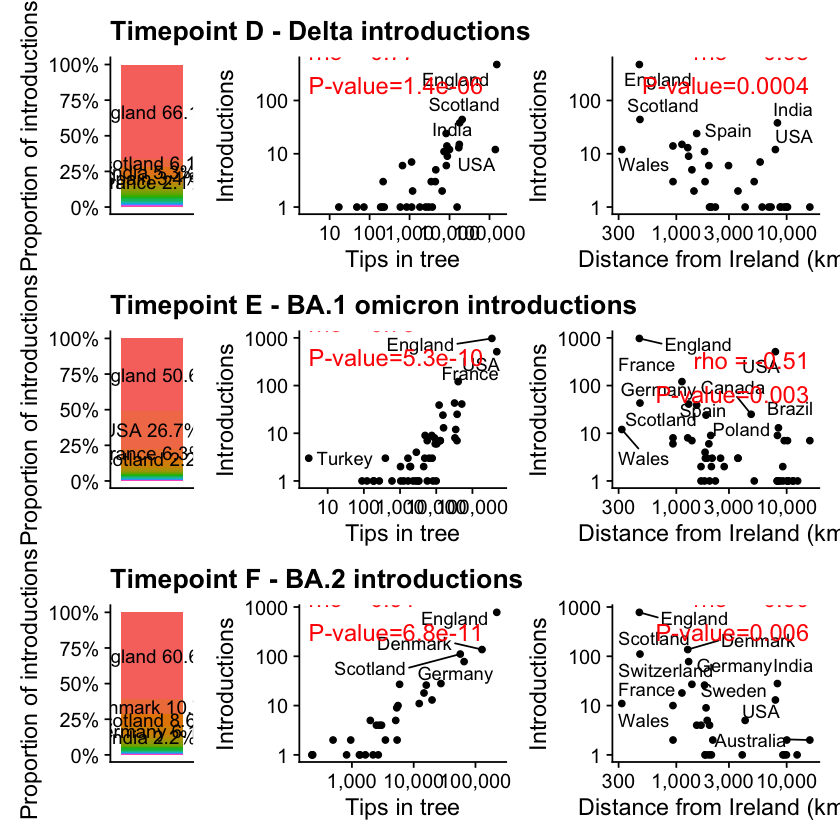

In [135]:
timepoint_def_plot <- timepoint4_barplot + tips_scatter_timepoint_4 + distance_from_ireland_timepoint_4 + timepoint5_barplot + tips_scatter_timepoint_5 + distance_from_ireland_timepoint_5 + timepoint6_barplot + tips_scatter_timepoint_6 + distance_from_ireland_timepoint_6 +
  plot_layout(ncol = 3, widths = c(1.2, 3, 3))
timepoint_def_plot

In [136]:
ggsave('../outputFiles/figures/timepoint_def_multipanel.svg', width=32, height=36, units = "cm")

Warning message:
“Removed 29 rows containing missing values (geom_text).”
Warning message:
“Removed 43 rows containing missing values (geom_text).”
Warning message:
“Removed 25 rows containing missing values (geom_text).”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 32 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [137]:
ggsave('../outputFiles/figures/timepoint_def_multipanel.pdf', width=32, height=36, units = "cm")

Warning message:
“Removed 29 rows containing missing values (geom_text).”
Warning message:
“Removed 43 rows containing missing values (geom_text).”
Warning message:
“Removed 25 rows containing missing values (geom_text).”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 32 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [116]:
timepoint_6_parent_country_frequency_distance_without_zero

,longitude,latitude,country,distance_from_ireland,num_tips,Both,RoI,NI
,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
17,-16.832657,38.020288,Portugal,1822.5166,1651,1,1,0
18,56.866654,-43.657479,New Zealand,12433.9004,232,1,0,1
37,35.027923,31.513542,Israel,4205.4163,1985,5,3,2
43,-127.763857,42.464272,USA,7903.7160,19806,13,5,8
44,2.936178,46.204109,France,1124.6902,14686,18,9,9
47,8.286929,46.736781,Switzerland,1384.6060,5915,27,24,3
48,4.675010,50.618214,Belgium,933.6616,5392,2,2,0
49,10.461591,51.149282,Germany,1293.4638,65495,80,29,51
51,5.474577,52.137515,Netherlands,932.5277,5573,10,7,3


In [119]:
lm_6 = lm(Both~distance_from_ireland+num_tips, data = timepoint_6_parent_country_frequency_distance_without_zero)

In [91]:
test_data <- read.csv("~/Downloads//test_data.txt", sep='\t')
summary(test_data)

 parent_country         date             country              displ     
 Length:2           Length:2           Length:2           Min.   :-1.0  
 Class :character   Class :character   Class :character   1st Qu.:-0.5  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.0  
                                                          Mean   : 0.0  
                                                          3rd Qu.: 0.5  
                                                          Max.   : 1.0  

In [92]:
test_data$date <- as.Date(test_data$date)

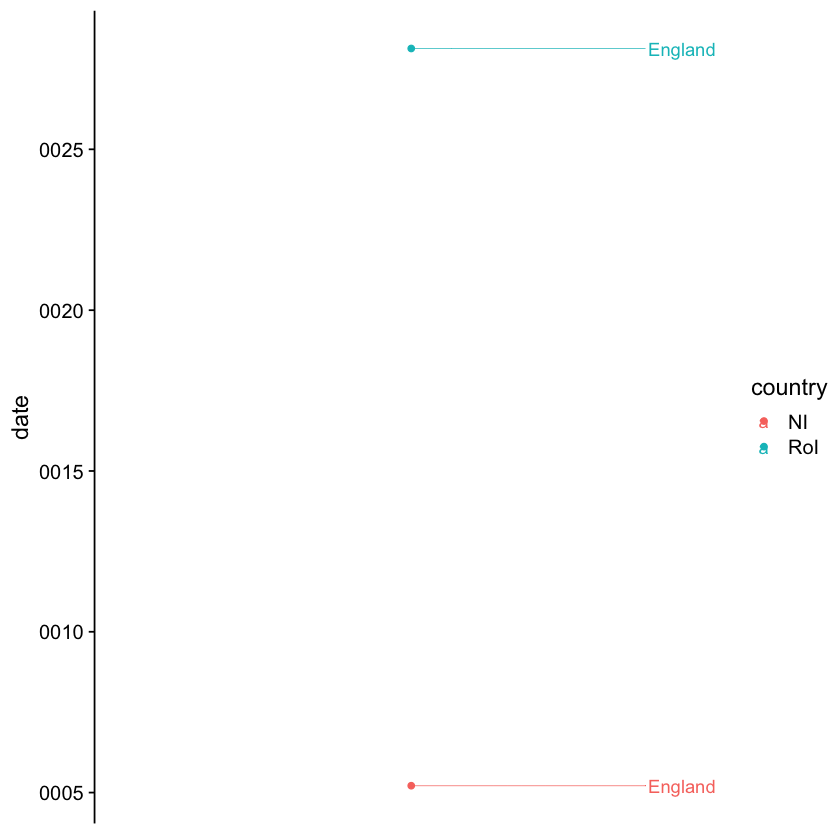

In [90]:



ggplot(test_data, aes(x = 0, y=date, label=parent_country, color=country)) +
theme_cowplot() +
  geom_point() + geom_text_repel(
    force             = 0.5,
    nudge_x           = 0.15,
    direction         = "y",
    hjust             = 0,
    segment.size      = 0.2,
    segment.curvature = -0.1
  ) +
  theme(
    axis.line.x  = element_blank(),
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.title.x = element_blank()
  ) +
  xlim(0, 0)

In [112]:
shift_axis <- function(p, xmin, xmax, y=0){
      g <- ggplotGrob(p)
      dummy <- data.frame(y=y)
      ax <- g[["grobs"]][g$layout$name == "axis-b"][[1]]
      p + annotation_custom(grid::grobTree(ax, vp = grid::viewport(y=1, height=sum(ax$height))), 
                            ymax=y, ymin=y) +
        annotate("segment", y = 0, yend = 0, x = xmin, xend = xmax, 
                 arrow = arrow(length = unit(0.1, "inches"))) +
        theme(axis.text.x = element_blank(), 
              axis.ticks.x=element_blank())

    }


#Conditionally set whether text will be above or below the point
vjust = ifelse(test_data$displ > 0, -1, 1.5)

p1 <- test_data %>% 
  ggplot(aes(date, displ)) +
    theme_cowplot() +
  geom_lollipop(point.size = 1) +
  geom_text(aes(x = date, y = displ, label = parent_country), data = test_data,
            hjust = 0, vjust = vjust, size = 2.5) +
  theme(axis.title = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.line = element_blank(),
        axis.text.x = element_text(size = 8)) +
  expand_limits(y = 1.2) +
  scale_x_date(breaks = scales::pretty_breaks(n = 9), date_labels = "%b %d")

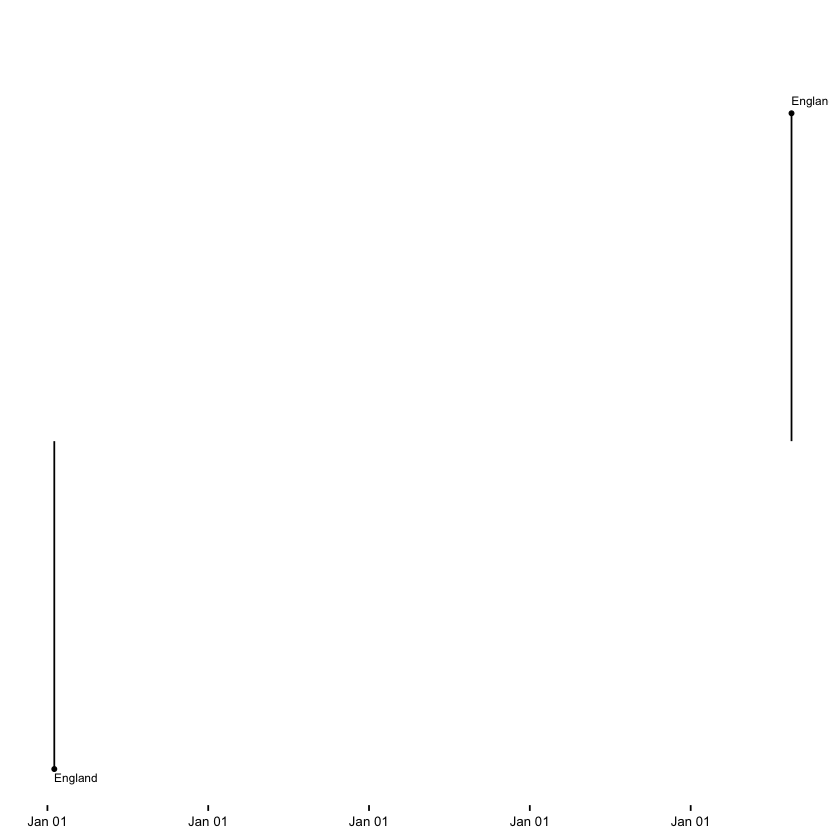

In [113]:
p1

In [114]:
timeline <- shift_axis(p1, as.Date('28/02/2020'), as.Date('05/03/2020'))

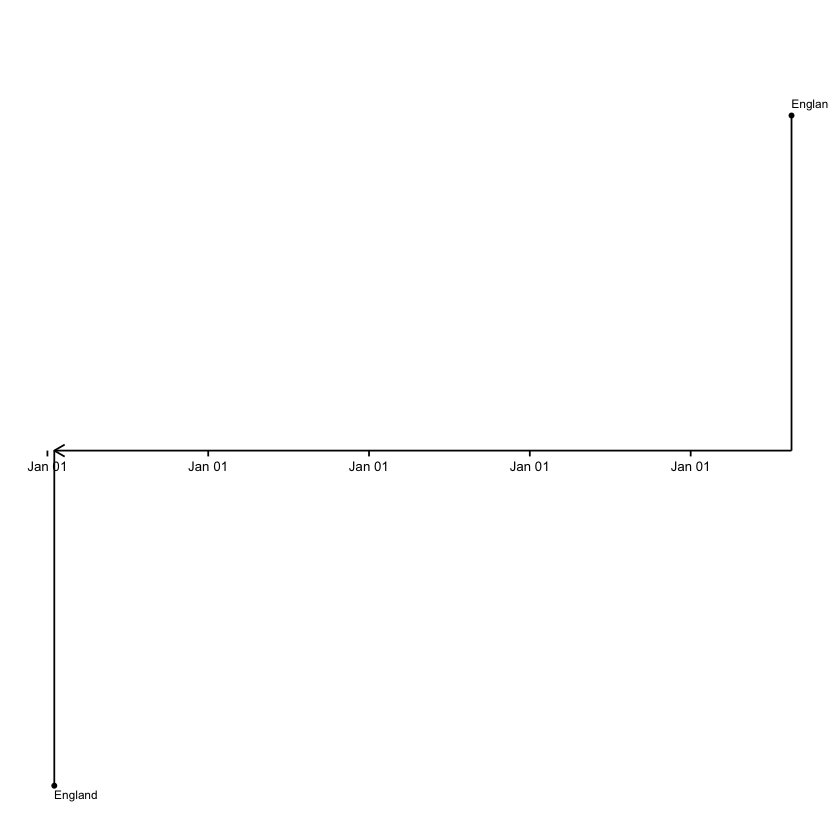

In [115]:
timeline

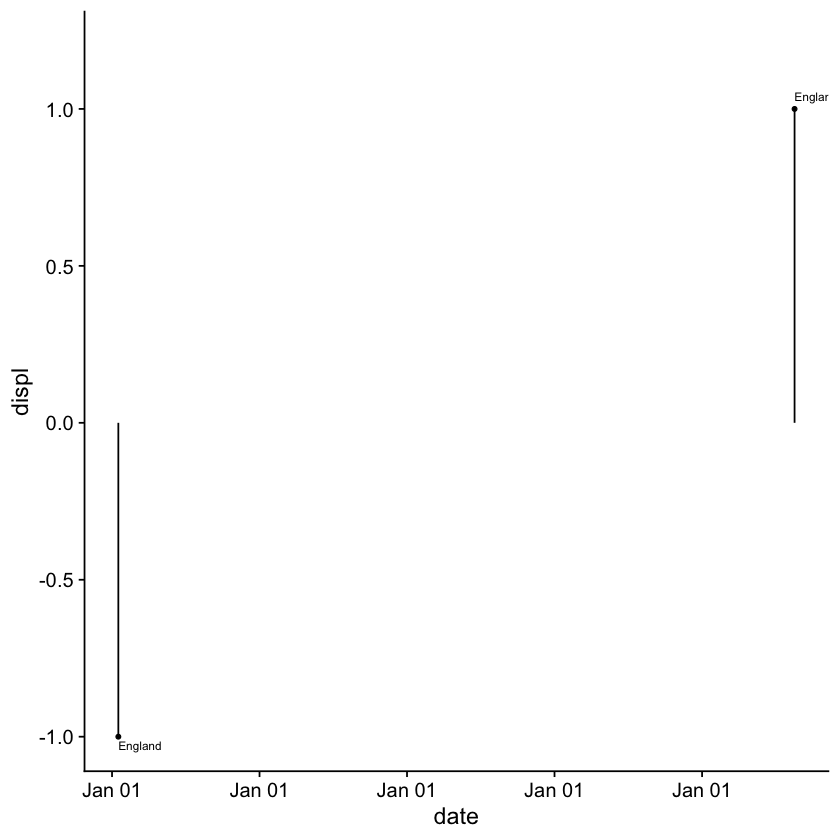

In [116]:
test_data %>% 
  ggplot(aes(date, displ)) +
    theme_cowplot() +
  geom_lollipop(point.size = 1) +
  geom_text(aes(x = date, y = displ, label = parent_country), data = test_data,
            hjust = 0, vjust = vjust, size = 2.5) +
  expand_limits(y = 1.2) +
  scale_x_date(breaks = scales::pretty_breaks(n = 9), date_labels = "%b %d")